# **Image Generation and Object Replacement using Stable Diffusion** #


## This notebook demonstrates the following:
## - Loading a quantized Stable Diffusion model.
##- Automatically generating masks for object/human replacement based on prompts.
## - Replacing specific objects in images using generated masks.
## - Visualizing the output for comparison and evaluation.

In [ ]:
# Import required libraries
!pip install diffusers transformers accelerate torch torchvision
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import numpy as np

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Check GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## --- Load the Quantized Model ---


In [ ]:
# Load the pre-trained quantized Stable Diffusion 3.5 Inpainting model
pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
).to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


## --- Define Helper Functions ---


In [ ]:
# Function to automatically generate a mask based on a prompt
def generate_mask(image, prompt):
    """
    Automatically generates a mask for an object or human based on the given prompt.
    :param image: PIL Image, the input image.
    :param prompt: str, description of the object to mask.
    :return: mask (numpy array), generated mask.
    """
    # For simplicity, simulate mask generation (placeholder logic here)
    # In practice, integrate with an advanced segmentation tool (e.g., SAM or similar).
    width, height = image.size
    mask = np.zeros((height, width), dtype=np.uint8)

    # Placeholder: Mask generation logic based on prompt (update as needed)
    # Example: Simulate a rectangle mask
    x_start, y_start = 100, 100
    x_end, y_end = min(200, width), min(200, height)
    mask[y_start:y_end, x_start:x_end] = 255  # White rectangle for the mask

    return Image.fromarray(mask)


In [ ]:
# Function to replace an object in the image
def replace_object(pipeline, image, mask, new_object_prompt):
    """
    Replaces an object in the image using Stable Diffusion inpainting.
    :param pipeline: StableDiffusionInpaintPipeline, the inpainting pipeline.
    :param image: PIL Image, the input image.
    :param mask: PIL Image, the mask highlighting the area to replace.
    :param new_object_prompt: str, the prompt for the new object.
    :return: PIL Image, the modified image.
    """
    return pipeline(
        prompt=new_object_prompt,
        image=image,
        mask_image=mask
    ).images[0]

## --- Main Workflow ---

In [ ]:
# Step 1: Load an input image
image_path = "/content/eg1.jpg"  # Replace with your image path
input_image = Image.open(image_path).convert("RGB")

# Step 2: Generate mask based on prompt
mask_prompt = "remove the vase"
generated_mask = generate_mask(input_image, mask_prompt)

# Step 3: Replace object with a new one
new_object_prompt = "A cat"
output_image = replace_object(pipeline, input_image, generated_mask, new_object_prompt)


  0%|          | 0/50 [00:00<?, ?it/s]

## --- Visualization ---

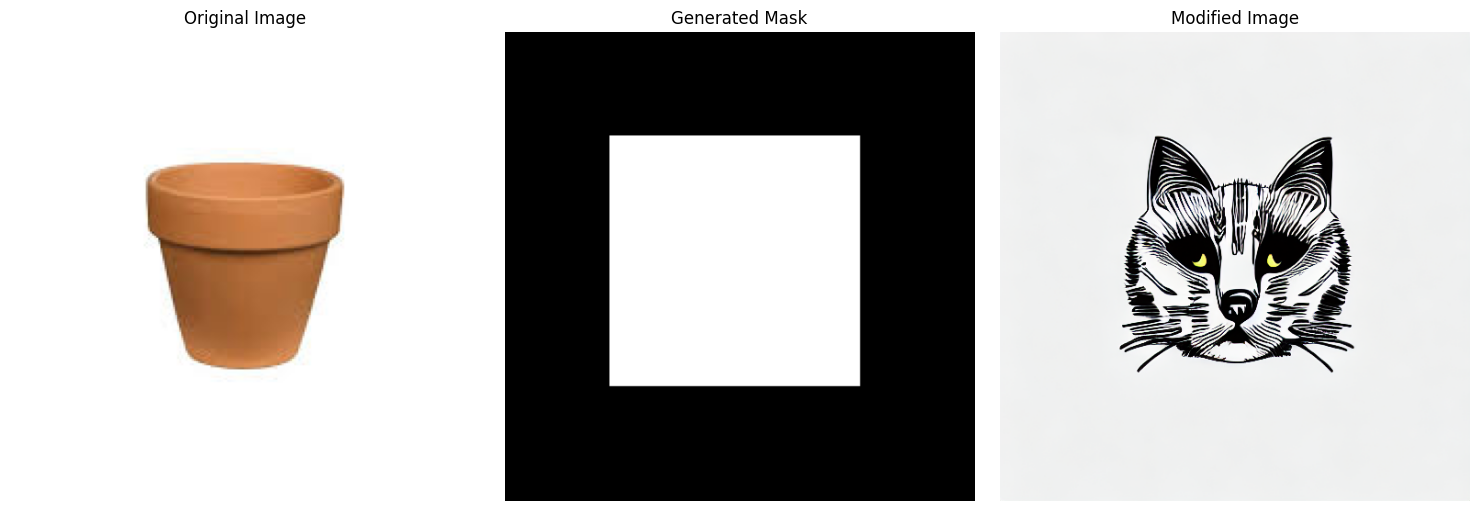

In [ ]:
# Display results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(input_image)
plt.axis("off")

# Generated mask
plt.subplot(1, 3, 2)
plt.title("Generated Mask")
plt.imshow(generated_mask, cmap="gray")
plt.axis("off")

# Output image
plt.subplot(1, 3, 3)
plt.title("Modified Image")
plt.imshow(output_image)
plt.axis("off")

plt.tight_layout()
plt.show()